In [1]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
import scipy.stats as stats

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Initialize the x- and y-arrays that we will use to plot
x_axis = []
mean = []
variance = []
skew_list = []
kurt_list = []

# generate gaussian pdf of x
mu = 2.0
variance = 2.0
sigma = math.sqrt(variance)
#x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
#plot(x, stats.norm.pdf(x, mu, sigma))
#show()

In [3]:
# proposal
def q(x):
    # add a random number drawn from a gaussian whose mean is the current position and the standard deviation is 1
    # randn() draws from a normalized gausian whose mean is 0 and stdev is 1
    return x + randn()

In [4]:
# density function f(x)
# returns 1 for all values of x
def f(x):
    return 1.0

In [5]:
xs = [3]    # initialize MCMC algorithm with arbitrary starting value of x
for i in range(20000):
    x = xs[-1]
    x_new = q(x)
    accept_ratio = f(x_new)/f(x) # acceptance ratio is 1 so it always accepts to take a step. It's a random walk!
    if rand() < accept_ratio:
        xs.append(x_new)
    else:
        xs.append(x)

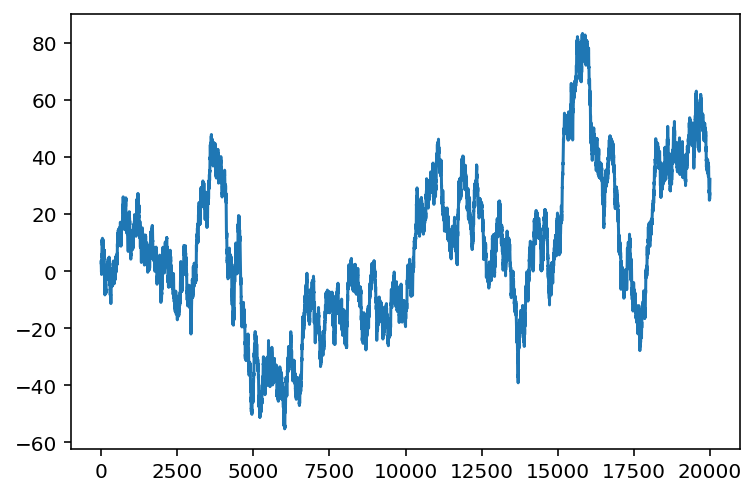

In [6]:
plot(xs)

The value of $x$ appears to run away over time! Namely, it favors a certain direction (either positive or negative) on long timescales.

(array([0.00062758, 0.0030297 , 0.00463111, 0.0045734 , 0.00583577,
        0.01167876, 0.01423236, 0.01543702, 0.0152639 , 0.01373462,
        0.01156334, 0.0089376 , 0.00904581, 0.00981766, 0.00706208,
        0.00360678, 0.00131287, 0.00106761, 0.0011686 , 0.00165191]),
 array([-55.21621011, -48.28516809, -41.35412607, -34.42308405,
        -27.49204203, -20.56100002, -13.629958  ,  -6.69891598,
          0.23212604,   7.16316805,  14.09421007,  21.02525209,
         27.95629411,  34.88733613,  41.81837814,  48.74942016,
         55.68046218,  62.6115042 ,  69.54254621,  76.47358823,
         83.40463025]),
 <a list of 20 Patch objects>)

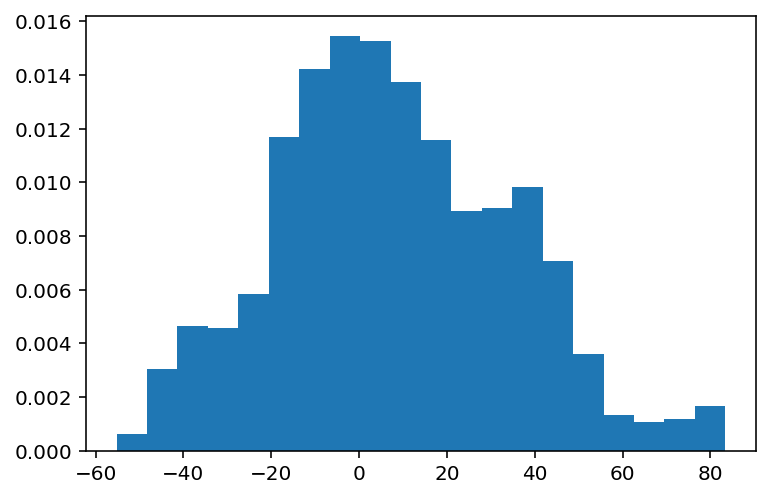

In [7]:
hist(xs, density=True, bins=20)

This results in a histogram of x-values that is skewed to one side and therefore does not approximate the original density function.